## World Choropleth Map

#### Source: https://plot.ly/python/choropleth-maps/

Import all necessary packages and set connection to Plotly

In [9]:
# Pip install plotly - Terminal command

import plotly.plotly as py
import pandas as pd
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt

plotly.tools.set_credentials_file(username='Zobis', api_key='zOGSBfrkb5sjtjS1s584')
plotly.tools.set_config_file(world_readable=True)

Load data exported from Wiki Scraper, which were cleaned and prepared with the use of MS Excel. Due to number of different patterns we were only able to clean around half of data, the rest was cleaned manually.

In [10]:
# Set scaling according to the data:

nMaxValue = 1500

# 0 and 4 equal ranges:
nDivPoint = nMaxValue / 90000

# Title:
sTitle = 'Number of Metal bands per country'

# Get rid of all columns, everywhere and replace them with nothing

df = pd.read_csv('Final_Data_Clean.csv', sep = ';')
# Auxiliary metrics for number of bands within country - To be used for grouping
df['Count'] = 1

Grouped_Data = df.groupby('State').sum()
Grouped_Data = pd.merge(Grouped_Data, df[['Code', 'State' ]], left_on = 'State', right_on = 'State', how = 'left')

# Show head of data
print(Grouped_Data[:5])

       State  Count Code
0    Andorra      1  AND
1  Argentina      7  ARG
2  Argentina      7  ARG
3  Argentina      7  ARG
4  Argentina      7  ARG


#### Cleaning the data - Origin (Country)
The data are really messy: there is bunch of patterns as well as number of complete nonsenses, which we are not able to solve automatically. Most of the job was done manually to present at least some results and do not lose significant part of data. To be able to use World Heat Map, we need to map column origin with a code of each country provided by authors of Plotly package.

In [21]:
# We processed origins with Excel formula instead:
# Get number of ocurrances of ',' and then take all to the right  from the last column
# =TRIM(IF(IFERROR(SEARCH(",";D2;SEARCH(",";D2;1)+2);0)<>0;
#    RIGHT(D2;LEN(D2)-SEARCH(",";D2;SEARCH(",";D2;1)+1));IF(IFERROR(SEARCH(",";D2;1);0)<>0;
#        RIGHT(D2;LEN(D2)-SEARCH(",";D2;1));D2)))

# Ignore bands without country, with more countries, manually change differently set countries, Replace countries with multinames (U. S. x U. S. A x United States etc.)
# Delete all characters with ASCII not corresponding to a - z, A - Z and 0-9 and "."
# Ignore bands with multiple countries
# Ignore bands without obvious country
# Ignore international bands

In [62]:
# Mapping: Country x Graph Code

data = [go.Choropleth(
    locations = Grouped_Data['Code'],
    z = Grouped_Data['Count'],
    text = Grouped_Data['State'],
    colorscale = [
        [0, "rgb(5, 10, 172)"],
        [0.2, "rgb(40, 60, 190)"],
        [0.4, "rgb(70, 100, 245)"],
        [0.6, "rgb(90, 120, 245)"],
        [0.8, "rgb(106, 137, 247)"],
        [1, "rgb(220, 220, 220)"]
    ],
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        title = 'Scale - Number of Bands'),
)]

layout = go.Layout(
    title = go.layout.Title(
        text = sTitle
    ),
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    ),
    annotations = [go.layout.Annotation(
        x = 0.55,
        y = 0.1,
        xref = 'paper',
        yref = 'paper',
        #text = 'Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            #CIA World Factbook</a>',
        showarrow = False
    )]
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-world-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Zobis/0 or inside your plot.ly account where it is named 'd3-world-map'


On the table you can see the scale of Metal bands within each country.

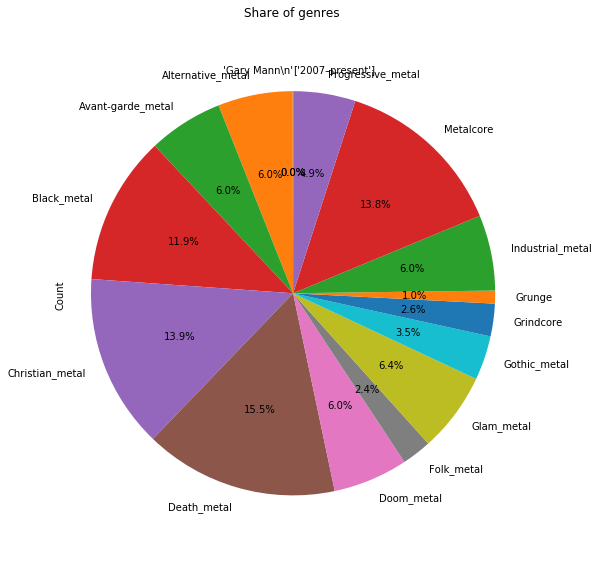

In [22]:
# autopct create %, start angle represent starting point
ShareType = df.groupby('Original genre').sum()
ShareType['Count'].plot(kind='pie',
                        figsize=(8, 10),
                        autopct='%1.1f%%', # add in percentages
                        startangle=90,     # start angle 90° (Africa)
                        shadow=False,       # add shadow      
                            )
 
plt.title('Share of genres')
plt.axis('equal') # Sets the pie chart to look like a circle.
 
plt.show()

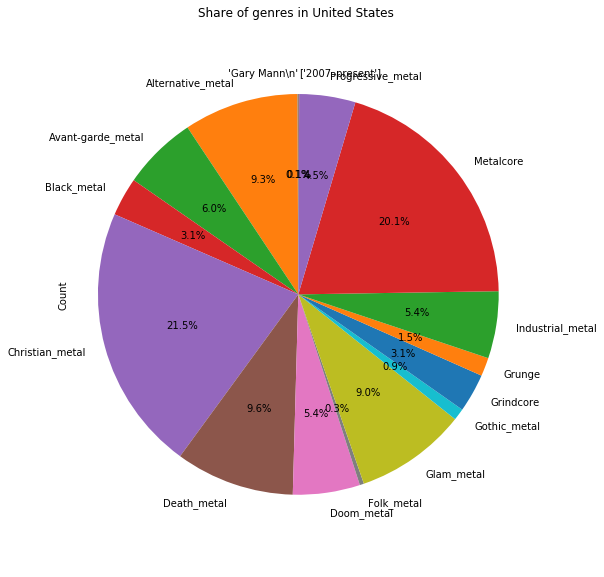

In [24]:
# Select a country for which you want to see share of Metal band types:
Country ='United States'

# Create the filter for data
is_Country =  df['State'] == Country
CountryTypes = df[is_Country]

# Use the same graph as in previous case
# autopct create %, start angle represent starting point
ShareTypeCountry = CountryTypes.groupby('Original genre').sum()
ShareTypeCountry['Count'].plot(kind='pie',
                        figsize=(8, 10),
                        autopct='%1.1f%%', # add in percentages
                        startangle=90,     # start angle 90° (Africa)
                        shadow=False,       # add shadow      
                            )
 
plt.title('Share of genres in ' + Country)
plt.axis('equal') # Sets the pie chart to look like a circle.
 
plt.show()